# Folded Czerny-Turner Spectrometer

In [1]:
from optiland import optic, physical_apertures
import optiland.backend as be

In [2]:
class CzernyTurnerSpectrometer(optic.Optic):
    """
    Folded Czerny–Turner spectrometer configuration (non-optimized).

    Layout:
      0: Entrance slit (object plane)
      1: Collimating concave mirror (stop surface)
      2: Plane reflective diffraction grating with offset aperture
      3: Focusing concave mirror with offset aperture
      4: Detector plane with offset aperture
    """

    def __init__(self):
        super().__init__()

        # Surface 0: entrance slit / object
        self.add_surface(index=0, x=0, y=0, z=0)

        # Surface 1: collimating concave mirror, defines aperture stop
        self.add_surface(
            index=1,
            radius=-200,
            x=0,
            y=0,
            z=100,
            rx=-0.2,
            material="mirror",
            is_stop=True
        )

        # Surface 2: reflective plane diffraction grating with offset aperture
        aperture2 = physical_apertures.OffsetRadialAperture(
            r_max=35, r_min=0, offset_x=0, offset_y=-30
        )
        self.add_surface(
            index=2,
            radius=be.inf,
            x=0,
            y=-25,
            z=0,
            rx=-0.6,
            material="mirror",
            surface_type="grating",
            grating_order=1,
            grating_period=2.5,  # microns (≈ 400 lines/mm)
            groove_orientation_angle=0.0,
            aperture=aperture2,
        )

        # Surface 3: focusing mirror with offset aperture
        aperture3 = physical_apertures.OffsetRadialAperture(
            r_max=35, r_min=0, offset_x=0, offset_y=-20
        )
        self.add_surface(
            index=3,
            radius=-207,
            x=0,
            y=50,
            z=50,
            rx=-1.34897,
            material="mirror",
            aperture=aperture3,
        )

        # Surface 4: detector plane with offset aperture
        aperture4 = physical_apertures.OffsetRadialAperture(
            r_max=20, r_min=0, offset_x=0, offset_y=-20
        )
        self.add_surface(
            index=4,
            x=0,
            y=-50,
            z=50,
            rx=-be.pi/2,
            aperture=aperture4,
        )

        # System aperture and field definition
        self.set_aperture(aperture_type="EPD", value=30)
        self.set_field_type(field_type="object_height")
        self.add_field(y=0)

        # Wavelengths to trace
        self.add_wavelength(value=0.550, is_primary=True)
        self.add_wavelength(value=0.400)
        self.add_wavelength(value=0.700)

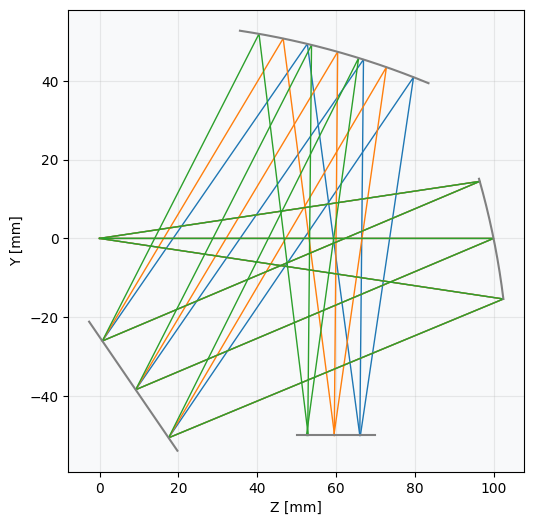

In [3]:
lens = CzernyTurnerSpectrometer()
_ = lens.draw(num_rays=3, wavelengths=[0.400, 0.550, 0.700], figsize=(6, 6))